In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
x = 460000
np.sqrt(8/x*math.log(4*(2*x)**10/.05, math.e))

0.04964277890917069

In [3]:
def vc_bound(N,delta,dvc):
    return np.sqrt(8/N*math.log(4*(2*N)**dvc/delta, math.e))

In [4]:
def rademacher_bound(N,delta,dvc):
    growth = (N)**dvc
    a = np.sqrt(2*math.log(2*N*growth, math.e)/N)
    b = np.sqrt(2/N*math.log(1/delta, math.e)+1/N)
    return a+b

In [21]:
def parrondo_ln(N,delta,dvc):
    growth = (2*N)**dvc
    ln = math.log(6*growth/delta, math.e)
    return ln

In [140]:
eps_range = np.arange(0,10,.001)

In [141]:
def parrondo_bound(N,delta,dvc):
    curbest = False
    for eps in eps_range:
        bound = np.sqrt(1/N*(2*eps+parrondo_ln(N,delta,dvc)))
        if abs(eps-bound)<curbest or curbest==False:
            curbest = abs(eps-bound)
            best_eps = eps
        else:
            return best_eps
    return best_eps
    #return quadratic(1,2/N,-parrondo_ln(N,delta,dvc))  

In [142]:
def devroye_ln(N,delta,dvc):
    growth = (N**2)**dvc
    ln = math.log(4*growth*int(1/delta), math.e)
    return ln

In [144]:
def devroye_bound(N,delta,dvc):
    curbest = False
    for eps in eps_range:
        bound = np.sqrt(1/(2*N)*((4*eps*(1+eps))+devroye_ln(N,delta,dvc)))
        if abs(eps-bound)<curbest or curbest==False:
            curbest = abs(eps-bound)
            best_eps = eps
        else:
            return best_eps
    return best_eps
    #return quadratic(1-(4/(2*N)),-4/(2*N),-devroye_ln(N,delta,dvc)/(2*N))

In [145]:
devroye_bound(5,.05,50)

5.593

In [146]:
N = 10000
print("VC %s" % vc_bound(N,.05,50))
print("Parrondo Bound %s" % parrondo_bound(N,.05,50))
print("Rademacher %s" %rademacher_bound(N,.05,50))
print("Devroye %s" %devroye_bound(N,.05,50))

VC 0.632174915200836
Parrondo Bound 0.224
Rademacher 0.3331726953555261
Devroye 0.215


In [147]:
devroye_bound(10000,.05,50)

0.215

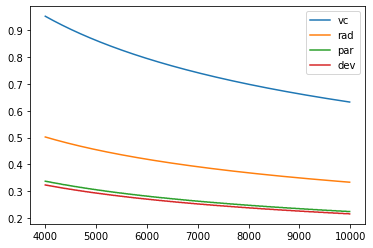

In [148]:
x = range(4000,10000,10)
plt.plot(x, [vc_bound(y,.05,50) for y in x],label="vc")
plt.plot(x, [rademacher_bound(y,.05,50) for y in x],label='rad')
plt.plot(x, [parrondo_bound(y,.05,50) for y in x],label='par')
plt.plot(x, [devroye_bound(y,.05,50) for y in x],label='dev')
plt.legend()

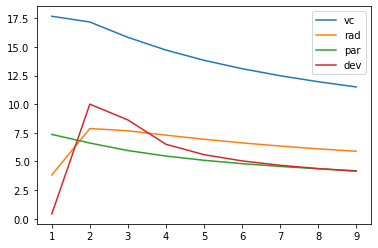

In [149]:
x = range(1,10)
plt.plot(x, [vc_bound(y,.05,50) for y in x],label="vc")
plt.plot(x, [rademacher_bound(y,.05,50) for y in x],label='rad')
plt.plot(x, [parrondo_bound(y,.05,50) for y in x],label='par')
plt.plot(x, [devroye_bound(y,.05,50) for y in x],label='dev')
plt.legend()